[*********************100%***********************]  1 of 1 completed


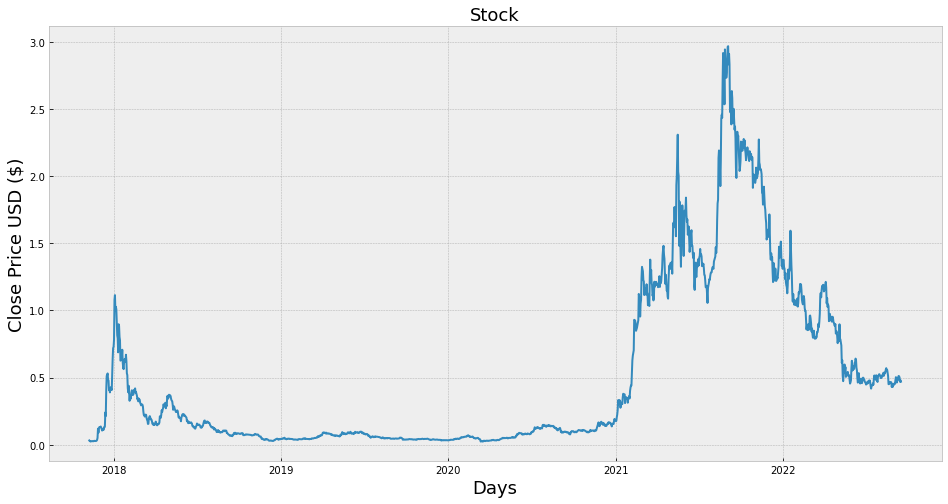

In [3]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('bmh')
###Fetching the Data
tickers=['ADA-USD']
df=yf.download(tickers,start="2014-1-1", end='2022-12-31')
# df1=df['Close']
plt.figure(figsize=(16,8))
plt.title('Stock', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

[*********************100%***********************]  1 of 1 completed


2022-09-15 23:18:30.153658: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-15 23:18:30.153697: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-15 23:18:30.254471: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-15 23:18:31.798671: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-15 23:18:31.798942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

Epoch 1/50
22/22 [==============================] - 18s 469ms/step - loss: 0.0329 - val_loss: 0.0070
Epoch 2/50
22/22 [==============================] - 8s 379ms/step - loss: 0.0015 - val_loss: 4.7321e-04
Epoch 3/50
22/22 [==============================] - 8s 383ms/step - loss: 6.4469e-04 - val_loss: 0.0012
Epoch 4/50
22/22 [==============================] - 9s 395ms/step - loss: 6.0365e-04 - val_loss: 9.6779e-04
Epoch 5/50
22/22 [==============================] - 8s 374ms/step - loss: 5.8658e-04 - val_loss: 9.7591e-04
Epoch 6/50
22/22 [==============================] - 10s 439ms/step - loss: 5.7980e-04 - val_loss: 9.0538e-04
Epoch 7/50
22/22 [==============================] - 12s 570ms/step - loss: 5.7360e-04 - val_loss: 0.0011
Epoch 8/50
22/22 [==============================] - 9s 396ms/step - loss: 5.2938e-04 - val_loss: 0.0010
Epoch 9/50
22/22 [==============================] - 9s 427ms/step - loss: 4.9410e-04 - val_loss: 0.0011
Epoch 10/50
22/22 [==============================] - 

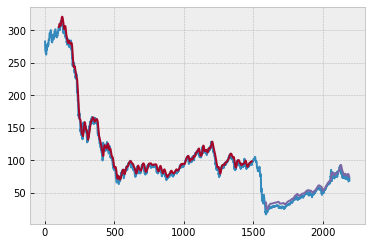

[0.19120952]
101
1 day input [0.19971766 0.19941517 0.20516268 0.20207046 0.206171   0.20049073
 0.21235548 0.21322937 0.2187752  0.20008739 0.1932307  0.20549879
 0.20902798 0.21591825 0.22206911 0.21534687 0.20922963 0.21356548
 0.21716188 0.21823743 0.21833826 0.21995161 0.22704355 0.22996773
 0.23000135 0.23023663 0.23598414 0.24344582 0.23981581 0.24536166
 0.25191583 0.24885723 0.24566415 0.24643722 0.24001747 0.23490858
 0.23736221 0.22284215 0.22522857 0.2145738  0.2081877  0.21588463
 0.2214641  0.22748051 0.22153131 0.21279241 0.21722909 0.19407098
 0.19034014 0.20002018 0.2067088  0.20566686 0.18744957 0.18872682
 0.18758402 0.19057542 0.20089405 0.20506185 0.20368378 0.19645737
 0.1932307  0.198911   0.19534822 0.20445685 0.20196961 0.20506185
 0.19524737 0.19793627 0.18986958 0.18314735 0.18318096 0.1899032
 0.18960069 0.19252487 0.19911266 0.19474322 0.18768485 0.18217262
 0.18489514 0.19215515 0.19165097 0.19373488 0.20096129 0.20502824
 0.19985211 0.19766738 0.20721297 

8 day output [[0.20072255]]
[[0.19120952486991882], [0.19092689454555511], [0.19127991795539856], [0.1921718716621399], [0.19347622990608215], [0.19507144391536713], [0.19685684144496918], [0.19875764846801758], [0.20072254538536072]]


In [4]:

#############ModelOne###
###Fetching the Data
tickers= ['ADA-USD']
df=yf.download(tickers,start="2014-1-1", end='2022-12-31')
df1=df['Close']

########2
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

##split1
training_size=int(len(df1)*0.68)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

#ALGO1
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape1 
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# reshape2 
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

#ModelsRuns
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

##100 Iterations
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

#######3
import tensorflow as tf
### metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#####4
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
BacktestError=math.sqrt(mean_squared_error(y_train,train_predict))
BacktestError
len(train_predict)
len(y_train)

y= pd.DataFrame(train_predict)
x=pd.DataFrame(y_train)

#######
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#########6
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

# demonstrate prediction for next 5 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<9):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

######7
day_new=np.arange(1,101)
day_pred=np.arange(101,109)



In [5]:
##See all the predictions
predictions=pd.DataFrame(scaler.inverse_transform(lst_output))
predictions.columns=['Close']
predictions['Date'] = pd.date_range(start='8/15/2021', periods=len(predictions), freq='D')
predictions

,Close,Date
0,73.928658,2021-08-15
1,73.844570,2021-08-16
2,73.949601,2021-08-17
3,74.214976,2021-08-18
4,74.603048,2021-08-19
5,75.077656,2021-08-20
6,75.608848,2021-08-21
7,76.174376,2021-08-22
8,76.758972,2021-08-23
